In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print('Version TensorFlow: ', tf.__version__)

Version TensorFlow:  2.10.0


# Загрузка датасета

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

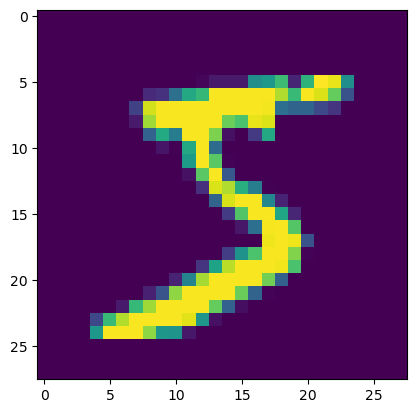

In [6]:
img = X_train[0]
plt.imshow(img);

# Нормализация простейшая

In [7]:
X_train, X_test = X_train / 255., X_test / 255.

# Создание модели

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])

In [9]:
X_train[:1].shape

(1, 28, 28)

In [10]:
# logit для первой картинки
logit = model(X_train[:1]).numpy()
logit

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [11]:
prob = tf.nn.softmax(logit).numpy()
prob

array([[0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00104672, 0.00104672,
        0.00104672, 0.00104672, 0.00104672, 0.00

In [12]:
prob.max(), prob.argmax(), prob.shape

(0.0028452803, 161, (1, 784))

# Loss

In [13]:
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)  # Кросс энтропия

In [14]:
loss_fn(y_train[:1], logit).numpy()

6.862094

# Компиляция модели

In [15]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

# Обучение модели

In [16]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 836us/step - loss: 6.8522 - accuracy: 0.0000e+00
Epoch 2/5
1875/1875 [==============================] - 2s 834us/step - loss: 6.8522 - accuracy: 0.0000e+00
Epoch 3/5
1875/1875 [==============================] - 2s 855us/step - loss: 6.8522 - accuracy: 0.0000e+00
Epoch 4/5
1875/1875 [==============================] - 2s 828us/step - loss: 6.8521 - accuracy: 0.0000e+00
Epoch 5/5
1875/1875 [==============================] - 2s 833us/step - loss: 6.8522 - accuracy: 0.0000e+00


# Оценка модели

In [17]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 6.8548 - accuracy: 0.0000e+00 - 331ms/epoch - 1ms/step


[6.854820251464844, 0.0]

In [18]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [19]:
prob = probability_model(X_test[:5]).numpy()
prob.shape

(5, 784)

In [20]:
prob

array([[0.00111459, 0.00111459, 0.00111459, ..., 0.00111459, 0.00111459,
        0.00111459],
       [0.00103648, 0.00103648, 0.00103648, ..., 0.00103648, 0.00103648,
        0.00103648],
       [0.00118523, 0.00118523, 0.00118523, ..., 0.00118523, 0.00118523,
        0.00118523],
       [0.00098011, 0.00098011, 0.00098011, ..., 0.00098011, 0.00098011,
        0.00098011],
       [0.0011092 , 0.0011092 , 0.0011092 , ..., 0.0011092 , 0.0011092 ,
        0.0011092 ]], dtype=float32)

In [21]:
prob.argmax(axis=1)

array([355,  97, 406, 262, 299], dtype=int64)